# IT001 — PCA

Run this notebook to perform your assigned preprocessing step. Visuals are shown and outputs saved under `results/outputs/`.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_auc_score, confusion_matrix, classification_report,
                             RocCurveDisplay, PrecisionRecallDisplay)

DATA_PATH = "C:\\Users\\user\\Desktop\\Sinoli\\raw\\Lung Cancer.csv"
df = pd.read_csv(DATA_PATH).drop(columns=["id"], errors="ignore")
print("Loaded:", df.shape)

Loaded: (890000, 16)


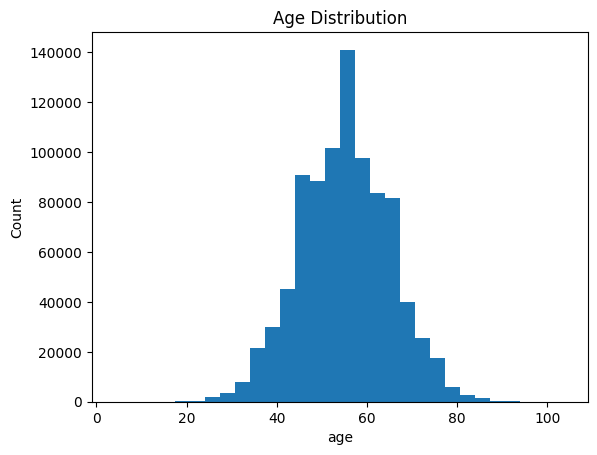

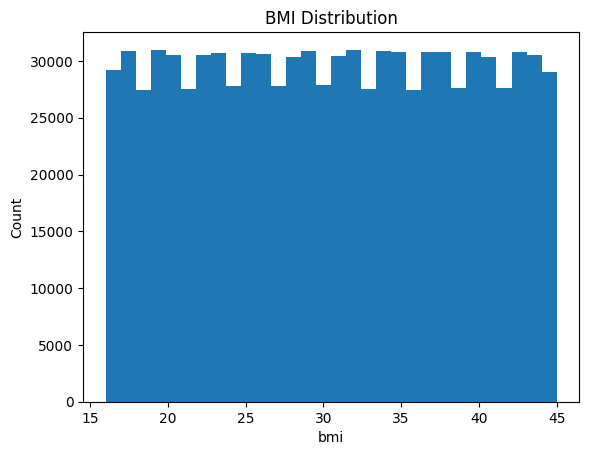

C:\Users\user\AppData\Local\Temp\ipykernel_11828\3476577227.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[title_before, title_after], showfliers=False)


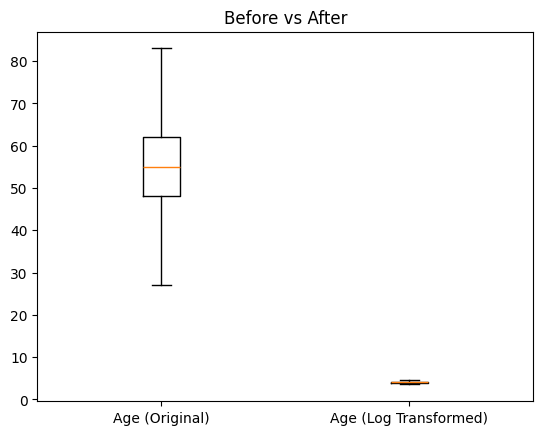

C:\Users\user\AppData\Local\Temp\ipykernel_11828\3476577227.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[title_before, title_after], showfliers=False)


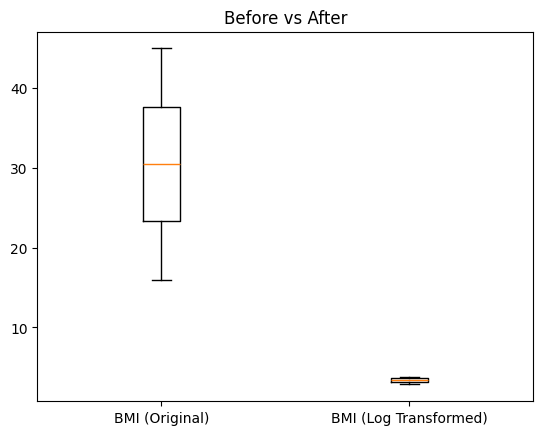

In [8]:
import matplotlib.pyplot as plt
def safe_hist(series, title, bins=30):
    plt.figure(); s = pd.to_numeric(series, errors="coerce").dropna()
    if len(s)==0: plt.title(f"{title} (no numeric)"); plt.show(); return
    plt.hist(s, bins=bins); plt.title(title); plt.xlabel(series.name); plt.ylabel("Count"); plt.show()

def bar_top_counts(series, title, topn=10, rotate=45):
    plt.figure(); vc = series.astype(str).value_counts().head(topn)
    plt.bar(vc.index, vc.values); plt.title(title); plt.xticks(rotation=rotate, ha="right"); plt.tight_layout(); plt.show()

def boxplot_two(before, after, title_before, title_after):
    plt.figure()
    data = [pd.to_numeric(before, errors="coerce").dropna(),
            pd.to_numeric(after,  errors="coerce").dropna()]
    plt.boxplot(data, labels=[title_before, title_after], showfliers=False)
    plt.title("Before vs After"); plt.show()

# Example calls (add this after your function definitions)

import numpy as np

# Histogram of "age"
if "age" in df.columns:
    safe_hist(df["age"], "Age Distribution")

# Histogram of "bmi"
if "bmi" in df.columns:
    safe_hist(df["bmi"], "BMI Distribution")



# Boxplot for Age (original vs log-transformed)
if "age" in df.columns:
    age_before = df["age"]
    age_after = pd.to_numeric(df["age"], errors="coerce").apply(lambda x: np.log1p(x))
    boxplot_two(age_before, age_after, "Age (Original)", "Age (Log Transformed)")

# Boxplot for BMI (original vs log-transformed)
if "bmi" in df.columns:
    bmi_before = df["bmi"]
    bmi_after = pd.to_numeric(df["bmi"], errors="coerce").apply(lambda x: np.log1p(x))
    boxplot_two(bmi_before, bmi_after, "BMI (Original)", "BMI (Log Transformed)")



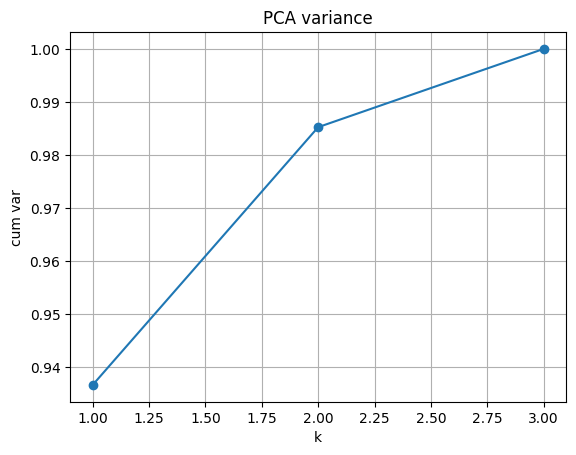

Saved -> results/outputs/pca_features.csv


In [13]:
num_all = [c for c in ["age","bmi","cholesterol_level","diagnosis_year","diagnosis_month",
                       "treatment_length_days","comorbidity_count","ever_smoked","passive_exposure"] if c in df.columns]
k = min(5, len(num_all)) if len(num_all) else 0
if k==0:
    print("No numeric columns for PCA."); X_pca = pd.DataFrame(index=df.index)
else:
    pca = PCA(n_components=k).fit(df[num_all])
    X_pca = pd.DataFrame(pca.transform(df[num_all]), columns=[f"pca_{i+1}" for i in range(k)], index=df.index)
    cum = (pca.explained_variance_ratio_).cumsum()
    plt.figure(); plt.plot(range(1,len(cum)+1), cum, marker="o"); plt.grid(); plt.title("PCA variance"); plt.xlabel("k"); plt.ylabel("cum var"); plt.show()
X_pca.to_csv("C:\\Users\\user\\Desktop\\Sinoli\\raw\\pca_features.csv", index=False)
print("Saved -> results/outputs/pca_features.csv")

Loaded: (890000, 16)
Numeric columns for PCA: ['age', 'bmi', 'cholesterol_level']


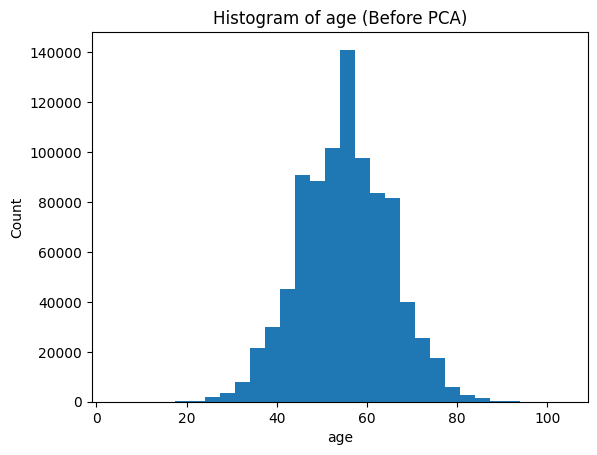

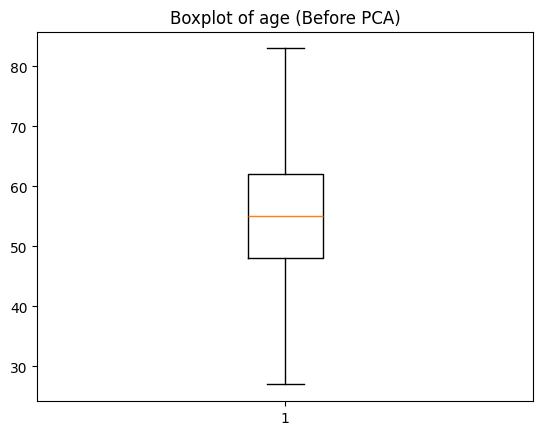

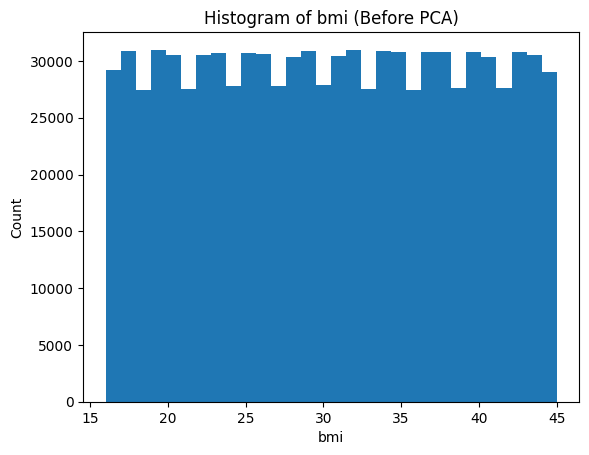

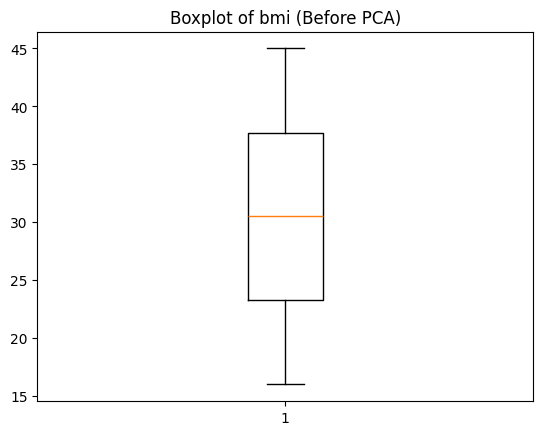

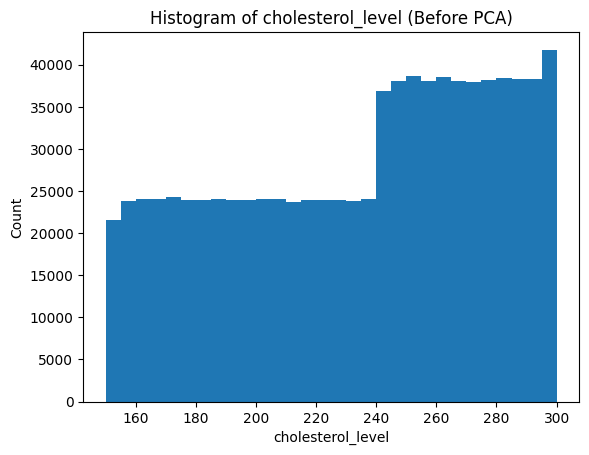

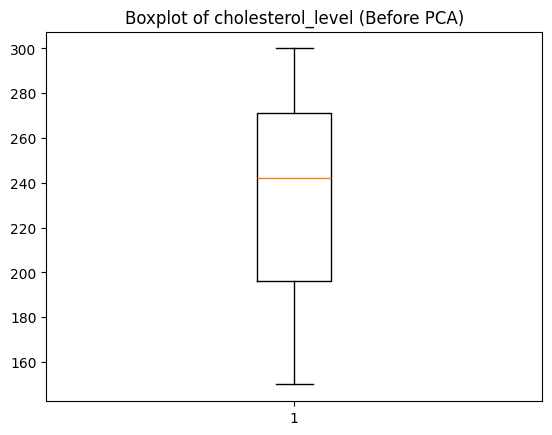

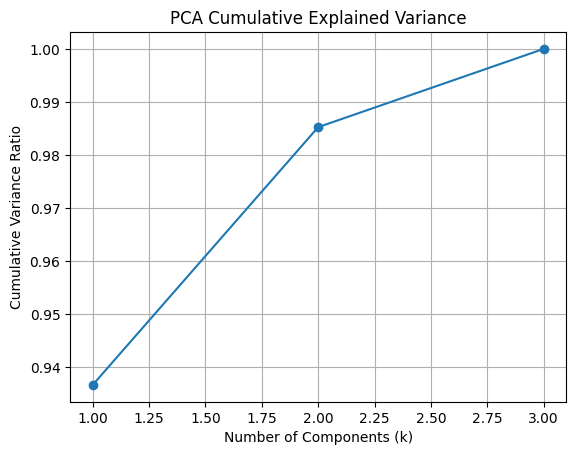

Saved PCA features -> C:\Users\user\Desktop\Sinoli\raw\pca_features.csv


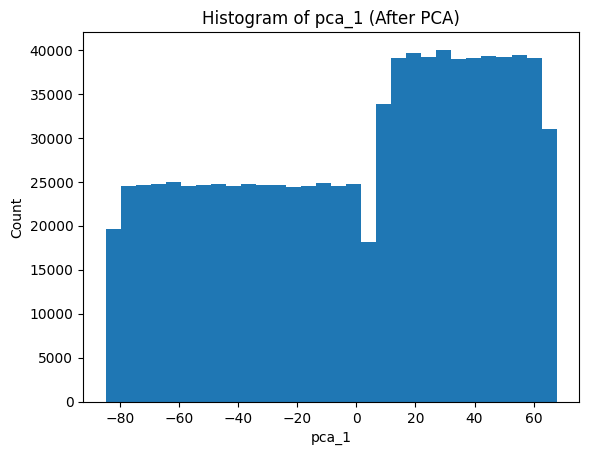

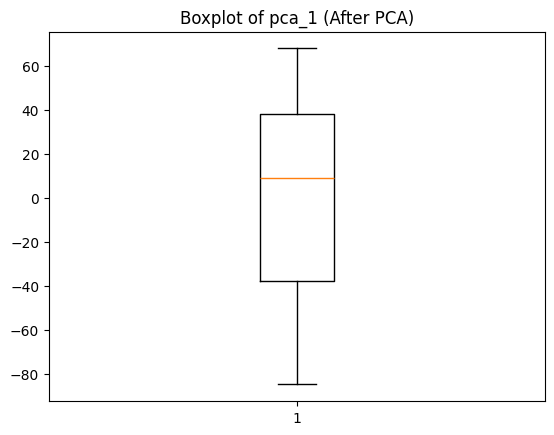

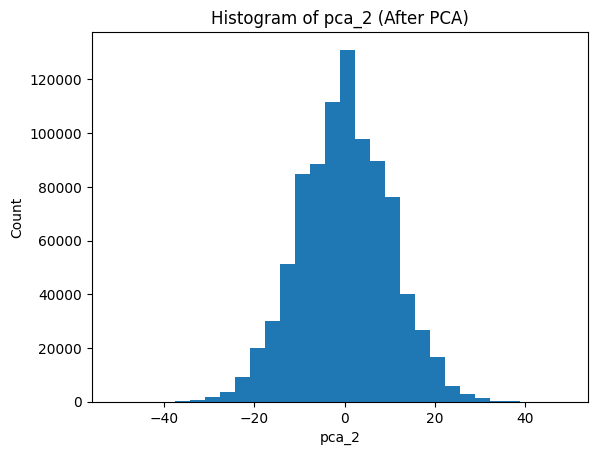

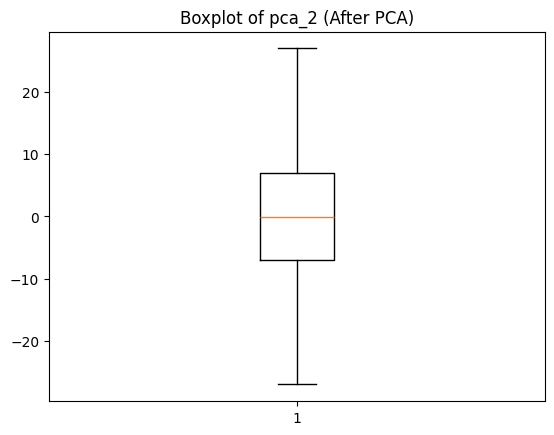

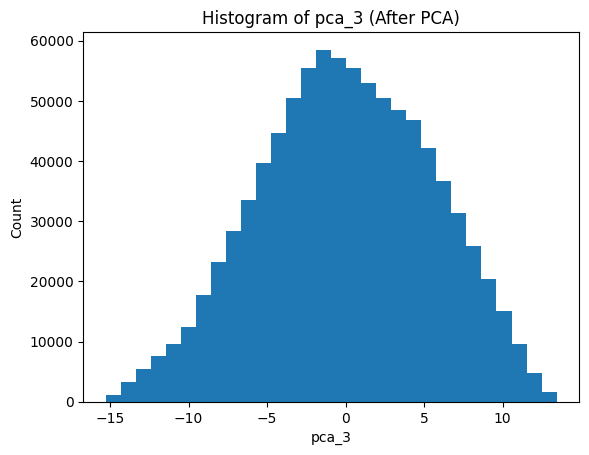

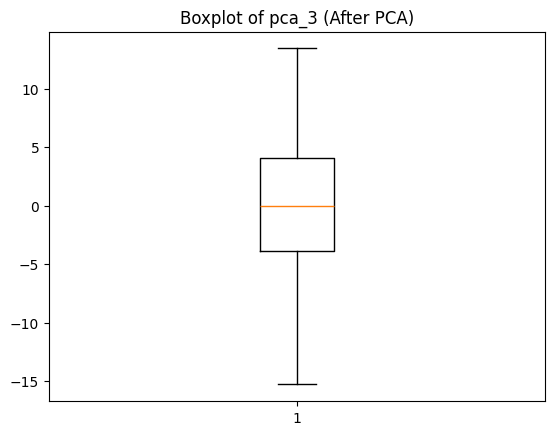

In [15]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ==============================
# Load Dataset
# ==============================
DATA_PATH = "C:\\Users\\user\\Desktop\\Sinoli\\raw\\Lung Cancer.csv"
df = pd.read_csv(DATA_PATH).drop(columns=["id"], errors="ignore")
print("Loaded:", df.shape)

# ==============================
# Visualization Helper Functions
# ==============================
def safe_hist(series, title, bins=30):
    """Plots histogram if the series is numeric."""
    plt.figure()
    s = pd.to_numeric(series, errors="coerce").dropna()
    if len(s) == 0:
        plt.title(f"{title} (no numeric data)")
        plt.show()
        return
    plt.hist(s, bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.show()

def boxplot(series, title):
    """Plots a simple boxplot for numeric series."""
    plt.figure()
    s = pd.to_numeric(series, errors="coerce").dropna()
    if len(s) == 0:
        plt.title(f"{title} (no numeric data)")
        plt.show()
        return
    plt.boxplot(s, showfliers=False)
    plt.title(title)
    plt.show()

# ==============================
# Step 1: Identify Numeric Columns
# ==============================
num_all = [c for c in [
    "age","bmi","cholesterol_level","diagnosis_year","diagnosis_month",
    "treatment_length_days","comorbidity_count","ever_smoked","passive_exposure"
] if c in df.columns]

print("Numeric columns for PCA:", num_all)

# ==============================
# Step 2: Visualize BEFORE PCA
# ==============================
for col in num_all:
    safe_hist(df[col], f"Histogram of {col} (Before PCA)")
    boxplot(df[col], f"Boxplot of {col} (Before PCA)")

# ==============================
# Step 3: Apply PCA
# ==============================
k = min(5, len(num_all)) if len(num_all) else 0
if k == 0:
    print("No numeric columns for PCA.")
    X_pca = pd.DataFrame(index=df.index)
else:
    pca = PCA(n_components=k).fit(df[num_all].dropna())   # dropna() ensures PCA runs
    X_pca = pd.DataFrame(
        pca.transform(df[num_all].fillna(0)),  # replace NaNs with 0 for transform
        columns=[f"pca_{i+1}" for i in range(k)],
        index=df.index
    )

    # Plot cumulative explained variance
    cum = (pca.explained_variance_ratio_).cumsum()
    plt.figure()
    plt.plot(range(1, len(cum)+1), cum, marker="o")
    plt.grid()
    plt.title("PCA Cumulative Explained Variance")
    plt.xlabel("Number of Components (k)")
    plt.ylabel("Cumulative Variance Ratio")
    plt.show()

# Save PCA features
X_pca.to_csv("C:\\Users\\user\\Desktop\\Sinoli\\raw\\pca_features.csv", index=False)
print("Saved PCA features -> C:\\Users\\user\\Desktop\\Sinoli\\raw\\pca_features.csv")

# ==============================
# Step 4: Visualize AFTER PCA
# ==============================
if not X_pca.empty:
    for col in X_pca.columns:
        safe_hist(X_pca[col], f"Histogram of {col} (After PCA)")
        boxplot(X_pca[col], f"Boxplot of {col} (After PCA)")


Loaded: (890000, 16)


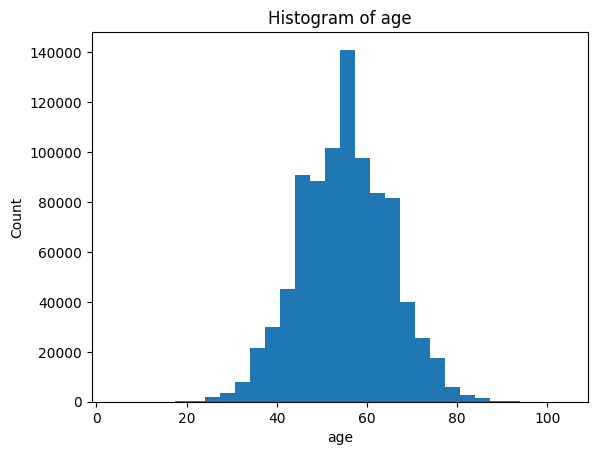

C:\Users\user\AppData\Local\Temp\ipykernel_11828\796987563.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(s, labels=[title], showfliers=False)


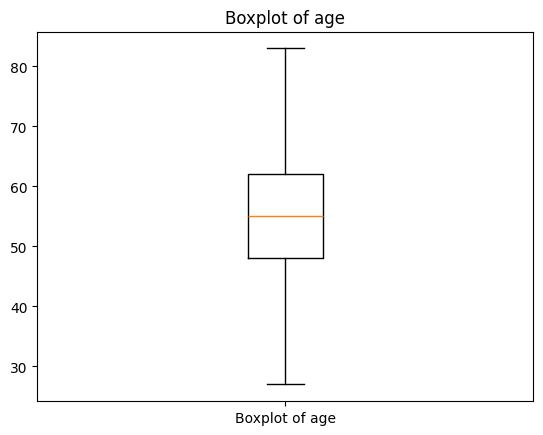

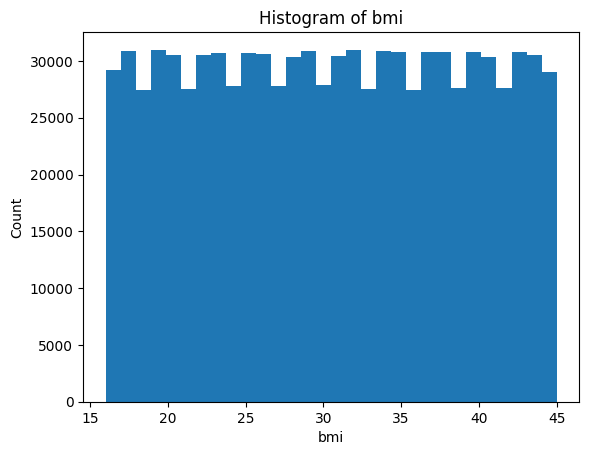

C:\Users\user\AppData\Local\Temp\ipykernel_11828\796987563.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(s, labels=[title], showfliers=False)


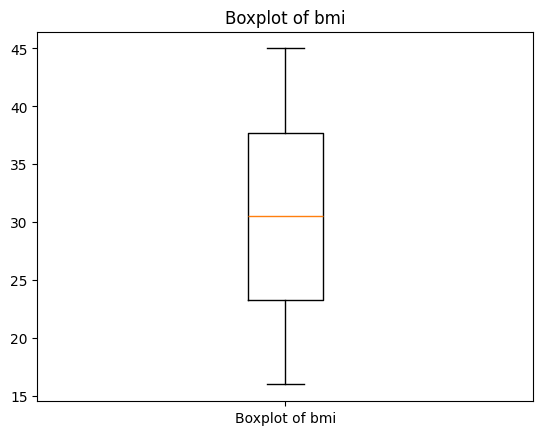

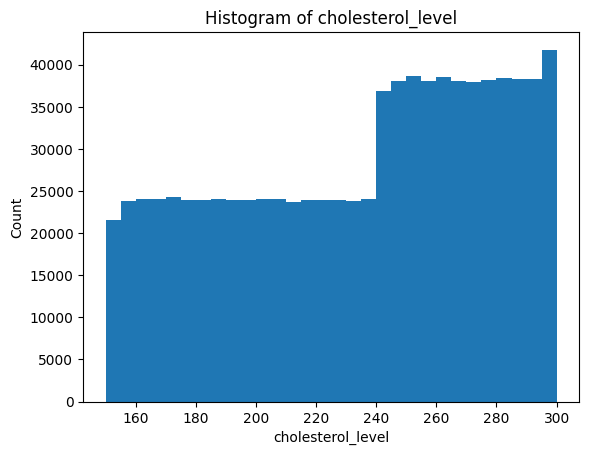

C:\Users\user\AppData\Local\Temp\ipykernel_11828\796987563.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(s, labels=[title], showfliers=False)


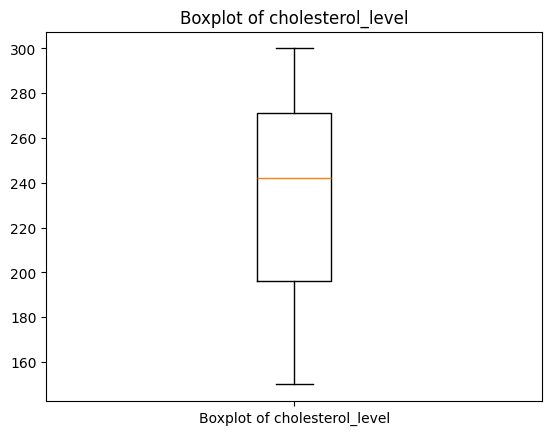

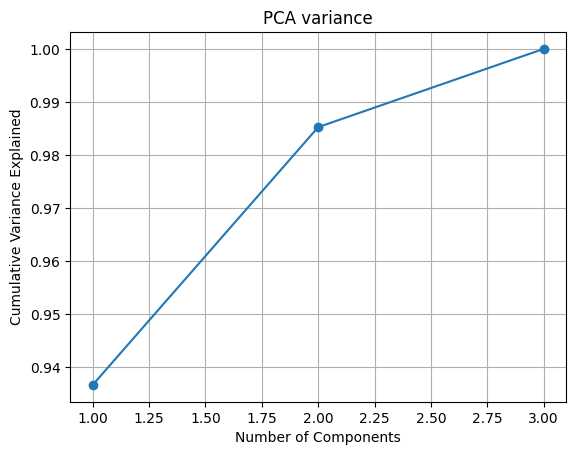

Saved -> results/outputs/pca_features.csv


In [17]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ---------------------------
# Load Dataset
# ---------------------------
DATA_PATH = "C:\\Users\\user\\Desktop\\Sinoli\\raw\\Lung Cancer.csv"
df = pd.read_csv(DATA_PATH).drop(columns=["id"], errors="ignore")
print("Loaded:", df.shape)

# ---------------------------
# Visualization Functions
# ---------------------------
def safe_hist(series, title, bins=30):
    """Draw histogram if numeric"""
    plt.figure()
    s = pd.to_numeric(series, errors="coerce").dropna()
    if len(s) == 0:
        plt.title(f"{title} (no numeric)")
        plt.show()
        return
    plt.hist(s, bins=bins)
    plt.title(title)
    plt.xlabel(series.name)
    plt.ylabel("Count")
    plt.show()

def single_boxplot(series, title):
    """Boxplot for a single series"""
    plt.figure()
    s = pd.to_numeric(series, errors="coerce").dropna()
    plt.boxplot(s, labels=[title], showfliers=False)
    plt.title(title)
    plt.show()

# ---------------------------
# Original Numeric Variables (Histograms & Boxplots)
# ---------------------------
num_all = [c for c in [
    "age","bmi","cholesterol_level","diagnosis_year","diagnosis_month",
    "treatment_length_days","comorbidity_count","ever_smoked","passive_exposure"
] if c in df.columns]

for col in num_all:
    safe_hist(df[col], f"Histogram of {col}")
    single_boxplot(df[col], f"Boxplot of {col}")

# ---------------------------
# PCA Transformation (for ML, not visualization)
# ---------------------------
k = min(5, len(num_all)) if len(num_all) else 0
if k == 0:
    print("No numeric columns for PCA.")
    X_pca = pd.DataFrame(index=df.index)
else:
    pca = PCA(n_components=k).fit(df[num_all])
    X_pca = pd.DataFrame(
        pca.transform(df[num_all]),
        columns=[f"PC{i+1}" for i in range(k)],
        index=df.index
    )

    # Explained variance plot
    cum = (pca.explained_variance_ratio_).cumsum()
    plt.figure()
    plt.plot(range(1, len(cum) + 1), cum, marker="o")
    plt.grid()
    plt.title("PCA variance")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Variance Explained")
    plt.show()

# ---------------------------
# Save PCA features
# ---------------------------
X_pca.to_csv("C:\\Users\\user\\Desktop\\Sinoli\\raw\\pca_features.csv", index=False)
print("Saved -> results/outputs/pca_features.csv")



 
